In [1]:
import pandas as pd
import numpy as np
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%matplotlib inline

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Download Data of Image-predictions

In [3]:
url_download = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url_download)

with open('image-predictions.tsv', mode='wb') as f:
        f.write(r.content)

In [4]:
img_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

## Twitter API
**Extarct the new information from twitter by tweepy and save them in json File**

In [ ]:
consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')

#access_token = os.environ.get('ACCESS_TOKEN')
#access_secret = os.environ.get('ACCESS_SECRET')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
redirect_url = auth.get_authorization_url()
print(redirect_url)


In [34]:
auth.get_access_token('#####')

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [43]:
# Extract retweet_count and favorite_count and save them in tweet-json.txt file

keys = ['id', 'retweet_count', 'favorite_count']
tweets_id = twitter_archive.tweet_id
tweets_info = []
length = len(tweets_id)
errors = {}

for i,t_id in enumerate(tweets_id):
    
    try:
        tweet = api.get_status(t_id, tweet_mode='extended')._json
        tweet_dict = {key : tweet[key] for key in keys}
        tweets_info.append(tweet_dict)
        print(f"Success ({i}/{length})")
    except tweepy.TweepError as e:
        errors[t_id] = e
        print(f"Fail ({i}/{length})")
    
with open('tweet-json.txt', 'w') as f:
    json.dump(tweets_info, f)
    

Success (0/2356)
Success (1/2356)
Success (2/2356)
Success (3/2356)
Success (4/2356)
Success (5/2356)
Success (6/2356)
Success (7/2356)
Success (8/2356)
Success (9/2356)
Success (10/2356)
Success (11/2356)
Success (12/2356)
Success (13/2356)
Success (14/2356)
Success (15/2356)
Success (16/2356)
Success (17/2356)
Success (18/2356)
Fail (19/2356)
Success (20/2356)
Success (21/2356)
Success (22/2356)
Success (23/2356)
Success (24/2356)
Success (25/2356)
Success (26/2356)
Success (27/2356)
Success (28/2356)
Success (29/2356)
Success (30/2356)
Success (31/2356)
Success (32/2356)
Success (33/2356)
Success (34/2356)
Success (35/2356)
Success (36/2356)
Success (37/2356)
Success (38/2356)
Success (39/2356)
Success (40/2356)
Success (41/2356)
Success (42/2356)
Success (43/2356)
Success (44/2356)
Success (45/2356)
Success (46/2356)
Success (47/2356)
Success (48/2356)
Success (49/2356)
Success (50/2356)
Success (51/2356)
Success (52/2356)
Success (53/2356)
Success (54/2356)
Success (55/2356)
Succe

Success (440/2356)
Success (441/2356)
Success (442/2356)
Success (443/2356)
Success (444/2356)
Success (445/2356)
Success (446/2356)
Success (447/2356)
Success (448/2356)
Success (449/2356)
Success (450/2356)
Success (451/2356)
Success (452/2356)
Success (453/2356)
Success (454/2356)
Success (455/2356)
Success (456/2356)
Success (457/2356)
Success (458/2356)
Success (459/2356)
Success (460/2356)
Success (461/2356)
Success (462/2356)
Success (463/2356)
Success (464/2356)
Success (465/2356)
Success (466/2356)
Success (467/2356)
Success (468/2356)
Success (469/2356)
Success (470/2356)
Success (471/2356)
Success (472/2356)
Success (473/2356)
Success (474/2356)
Success (475/2356)
Success (476/2356)
Success (477/2356)
Success (478/2356)
Success (479/2356)
Success (480/2356)
Success (481/2356)
Success (482/2356)
Success (483/2356)
Success (484/2356)
Success (485/2356)
Success (486/2356)
Success (487/2356)
Success (488/2356)
Success (489/2356)
Success (490/2356)
Success (491/2356)
Success (492

Rate limit reached. Sleeping for: 123


Success (829/2356)
Success (830/2356)
Success (831/2356)
Success (832/2356)
Success (833/2356)
Success (834/2356)
Success (835/2356)
Success (836/2356)
Success (837/2356)
Success (838/2356)
Success (839/2356)
Success (840/2356)
Success (841/2356)
Success (842/2356)
Success (843/2356)
Success (844/2356)
Success (845/2356)
Success (846/2356)
Success (847/2356)
Success (848/2356)
Success (849/2356)
Success (850/2356)
Success (851/2356)
Success (852/2356)
Success (853/2356)
Success (854/2356)
Success (855/2356)
Success (856/2356)
Success (857/2356)
Success (858/2356)
Success (859/2356)
Success (860/2356)
Success (861/2356)
Success (862/2356)
Success (863/2356)
Success (864/2356)
Success (865/2356)
Success (866/2356)
Success (867/2356)
Success (868/2356)
Success (869/2356)
Success (870/2356)
Success (871/2356)
Success (872/2356)
Success (873/2356)
Success (874/2356)
Success (875/2356)
Success (876/2356)
Success (877/2356)
Success (878/2356)
Success (879/2356)
Success (880/2356)
Success (881

Success (1248/2356)
Success (1249/2356)
Success (1250/2356)
Success (1251/2356)
Success (1252/2356)
Success (1253/2356)
Success (1254/2356)
Success (1255/2356)
Success (1256/2356)
Success (1257/2356)
Success (1258/2356)
Success (1259/2356)
Success (1260/2356)
Success (1261/2356)
Success (1262/2356)
Success (1263/2356)
Success (1264/2356)
Success (1265/2356)
Success (1266/2356)
Success (1267/2356)
Success (1268/2356)
Success (1269/2356)
Success (1270/2356)
Success (1271/2356)
Success (1272/2356)
Success (1273/2356)
Success (1274/2356)
Success (1275/2356)
Success (1276/2356)
Success (1277/2356)
Success (1278/2356)
Success (1279/2356)
Success (1280/2356)
Success (1281/2356)
Success (1282/2356)
Success (1283/2356)
Success (1284/2356)
Success (1285/2356)
Success (1286/2356)
Success (1287/2356)
Success (1288/2356)
Success (1289/2356)
Success (1290/2356)
Success (1291/2356)
Success (1292/2356)
Success (1293/2356)
Success (1294/2356)
Success (1295/2356)
Success (1296/2356)
Success (1297/2356)


Success (1658/2356)
Success (1659/2356)
Success (1660/2356)
Success (1661/2356)
Success (1662/2356)
Success (1663/2356)
Success (1664/2356)
Success (1665/2356)
Success (1666/2356)
Success (1667/2356)
Success (1668/2356)
Success (1669/2356)
Success (1670/2356)
Success (1671/2356)
Success (1672/2356)
Success (1673/2356)
Success (1674/2356)
Success (1675/2356)
Success (1676/2356)
Success (1677/2356)
Success (1678/2356)
Success (1679/2356)
Success (1680/2356)
Success (1681/2356)
Success (1682/2356)
Success (1683/2356)
Success (1684/2356)
Success (1685/2356)
Success (1686/2356)
Success (1687/2356)
Success (1688/2356)
Success (1689/2356)
Success (1690/2356)
Success (1691/2356)
Success (1692/2356)
Success (1693/2356)
Success (1694/2356)
Success (1695/2356)
Success (1696/2356)
Success (1697/2356)
Success (1698/2356)
Success (1699/2356)
Success (1700/2356)
Success (1701/2356)
Success (1702/2356)
Success (1703/2356)
Success (1704/2356)
Success (1705/2356)
Success (1706/2356)
Success (1707/2356)


Rate limit reached. Sleeping for: 267


Success (1729/2356)
Success (1730/2356)
Success (1731/2356)
Success (1732/2356)
Success (1733/2356)
Success (1734/2356)
Success (1735/2356)
Success (1736/2356)
Success (1737/2356)
Success (1738/2356)
Success (1739/2356)
Success (1740/2356)
Success (1741/2356)
Success (1742/2356)
Success (1743/2356)
Success (1744/2356)
Success (1745/2356)
Success (1746/2356)
Success (1747/2356)
Success (1748/2356)
Success (1749/2356)
Success (1750/2356)
Success (1751/2356)
Success (1752/2356)
Success (1753/2356)
Success (1754/2356)
Success (1755/2356)
Success (1756/2356)
Success (1757/2356)
Success (1758/2356)
Success (1759/2356)
Success (1760/2356)
Success (1761/2356)
Success (1762/2356)
Success (1763/2356)
Success (1764/2356)
Success (1765/2356)
Success (1766/2356)
Success (1767/2356)
Success (1768/2356)
Success (1769/2356)
Success (1770/2356)
Success (1771/2356)
Success (1772/2356)
Success (1773/2356)
Success (1774/2356)
Success (1775/2356)
Success (1776/2356)
Success (1777/2356)
Success (1778/2356)


Success (2139/2356)
Success (2140/2356)
Success (2141/2356)
Success (2142/2356)
Success (2143/2356)
Success (2144/2356)
Success (2145/2356)
Success (2146/2356)
Success (2147/2356)
Success (2148/2356)
Success (2149/2356)
Success (2150/2356)
Success (2151/2356)
Success (2152/2356)
Success (2153/2356)
Success (2154/2356)
Success (2155/2356)
Success (2156/2356)
Success (2157/2356)
Success (2158/2356)
Success (2159/2356)
Success (2160/2356)
Success (2161/2356)
Success (2162/2356)
Success (2163/2356)
Success (2164/2356)
Success (2165/2356)
Success (2166/2356)
Success (2167/2356)
Success (2168/2356)
Success (2169/2356)
Success (2170/2356)
Success (2171/2356)
Success (2172/2356)
Success (2173/2356)
Success (2174/2356)
Success (2175/2356)
Success (2176/2356)
Success (2177/2356)
Success (2178/2356)
Success (2179/2356)
Success (2180/2356)
Success (2181/2356)
Success (2182/2356)
Success (2183/2356)
Success (2184/2356)
Success (2185/2356)
Success (2186/2356)
Success (2187/2356)
Success (2188/2356)


In [5]:
# Read tweet-json to dataframe
twitter_info = pd.read_json('tweet-json.txt')

# Assess

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
print(twitter_archive.doggo.value_counts(),'\n')
print(twitter_archive.floofer.value_counts(),'\n')
print(twitter_archive.pupper.value_counts(),'\n')
print(twitter_archive.puppo.value_counts(),'\n')

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64 



In [9]:
twitter_archive.loc[:,['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [10]:
twitter_archive.query('rating_denominator != 10').loc[:, ['tweet_id','retweeted_status_id', 'text', 'name', 'rating_numerator', 'rating_denominator']]

,tweet_id,retweeted_status_id,text,name,rating_numerator,rating_denominator
313,835246439529840640,NaN,@jonnysun @Lin_Manuel ok jomny I know you're e...,None,960,0
342,832088576586297345,NaN,@docmisterio account started on 11/15/15,None,11,15
433,820690176645140481,NaN,The floofs have been released I repeat the flo...,None,84,70
516,810984652412424192,NaN,Meet Sam. She smiles 24/7 &amp; secretly aspir...,Sam,24,7
784,775096608509886464,7.403732e+17,"RT @dog_rates: After so many requests, this is...",None,9,11
902,758467244762497024,NaN,Why does this never happen at my front door......,None,165,150
1068,740373189193256964,NaN,"After so many requests, this is Bretagne. She ...",None,9,11
1120,731156023742988288,NaN,Say hello to this unbelievably well behaved sq...,this,204,170
1165,722974582966214656,NaN,Happy 4/20 from the squad! 13/10 for all https...,None,4,20
1202,716439118184652801,NaN,This is Bluebert. He just saw that both #Final...,Bluebert,50,50


In [11]:
twitter_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [12]:
print(int(twitter_archive.query('tweet_id == 684225744407494656').loc[:, "in_reply_to_status_id"].item()))

684222868335505408


In [13]:
len(twitter_archive[twitter_archive.expanded_urls.isnull()])

59

In [14]:
gh = twitter_archive[~twitter_archive.retweeted_status_id.isnull()].copy()
gh.retweeted_status_id = gh.retweeted_status_id.astype('Int64')
gh[['tweet_id','retweeted_status_id'] ]

,tweet_id,retweeted_status_id
19,888202515573088257,887473957103951872
32,886054160059072513,886053734421102592
36,885311592912609280,830583320585068544
68,879130579576475649,878057613040115712
73,878404777348136964,878281511006478336
...,...,...
1023,746521445350707200,667866724293877760
1043,743835915802583040,667138269671505920
1242,711998809858043904,711998279773347840
2259,667550904950915073,667548695664070656


In [15]:
r_ids = twitter_archive[twitter_archive.tweet_id.astype("Int64").isin(twitter_archive.retweeted_status_id.astype("Int64"))]['tweet_id']

for r_id in r_ids:
    up_base = twitter_archive.query(f'tweet_id == {r_id}').loc[:, "rating_numerator"].item()
    up_r =  twitter_archive[twitter_archive.retweeted_status_id.astype("Int64") == r_id].loc[:, "rating_numerator"].item()
    print(f"{up_base} - {up_r}: {up_base==up_r}")

13 - 13: True
14 - 14: True
12 - 12: True
12 - 12: True
13 - 13: True
12 - 12: True
13 - 13: True
12 - 12: True
12 - 12: True
12 - 12: True
12 - 12: True
12 - 12: True
13 - 13: True
13 - 13: True
12 - 12: True
12 - 12: True
11 - 11: True
14 - 14: True
13 - 13: True
12 - 12: True
14 - 14: True
13 - 13: True
10 - 10: True
11 - 11: True
13 - 13: True
13 - 13: True
13 - 13: True
11 - 11: True
12 - 12: True
13 - 13: True
13 - 13: True
12 - 12: True
12 - 12: True
12 - 12: True
12 - 12: True
12 - 12: True
12 - 12: True
75 - 75: True
12 - 12: True
12 - 12: True
13 - 13: True
12 - 12: True
12 - 12: True
10 - 10: True
12 - 12: True
12 - 12: True
13 - 13: True
12 - 12: True
11 - 11: True
12 - 12: True
11 - 11: True
11 - 11: True
13 - 13: True
14 - 14: True
11 - 11: True
11 - 11: True
11 - 11: True
8 - 8: True
10 - 10: True
11 - 11: True
10 - 10: True
11 - 11: True
10 - 10: True
11 - 11: True
13 - 13: True
12 - 12: True
8 - 8: True
13 - 13: True
12 - 12: True
12 - 12: True
11 - 11: True
12 - 12: T

In [16]:
img_prediction.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
img_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
envelope                1
Madagascar_cat          1
bakery                  1
tailed_frog             1
ping-pong_ball          1
Name: p1, Length: 378, dtype: int64

In [19]:
img_prediction.jpg_url.duplicated().sum()

66

In [20]:
img_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [21]:
twitter_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,7509,35519
1,892177421306343426,5575,30745
2,891815181378084864,3690,23115
3,891689557279858688,7693,38808
4,891327558926688256,8294,37092


In [22]:
twitter_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


## Quality
##### `twitter_archive` table
- Erroneous datatypes **(tweet_id and timestamp columns)**
- there are duplicated data because of retweet.
- Rating problems in tweets:
    - 832088576586297345 : The tweet is not relevant to what we need.
    - 810984652412424192 : The tweet is not relevant to what we need.
    - 749981277374128128 : The tweet is not relevant to what we need.
    - 686035780142297088 : The tweet is not relevant to what we need.
    - 682808988178739200 : The tweet is not relevant to what we need.
    - 684222868335505415 : The tweet is not relevant to what we need.
    - 684222868335505415 : The tweet is not relevant to what we need.
    - 775096608509886464 : Deleted tweet.
    - 758467244762497024 : There are 15 dogs are not at the same age and they are not of the same breed.
    - 731156023742988288 : There are 15 dogs are not at the same age and they are not of the same breed.
    - 709198395643068416 : There are 5 dogs are not at the same age and they are not of the same breed.
    - 740373189193256964 : Miss extraction of information, 9/11 should be 14/10.
    - 835246439529840640 : Miss extraction of information, 960/0 should be 13/10.
    - 666287406224695296 : Miss extraction of information, 1/2 should be 9/10.
    - 682962037429899265 : Miss extraction of information, 7/11 should be 10/10.
    - 722974582966214656 : Miss extraction of information, 4/20 should be 13/10.
    - 716439118184652801 : Miss extraction of information, 50/50 should be 11/10.
    - 786709082849828864 : Miss extraction of information,  should be 10/10.
    - 778027034220126208 : Miss extraction of information, 27/10 should be 11/10.
    - 680494726643068929 : Miss extraction of information, 26/10 should be 11/10.
    
    - 820690176645140481 : The tweet is about 7 dogs at same age and of same breed.(all next Will be solved at tidiness section)
    - 713900603437621249 : The tweet is about 9 dogs at same age and of same breed.
    - 710658690886586372 : The tweet is about 8 dogs at same age and of same breed.
    - 704054845121142784 : The tweet is about 5 dogs at same age and of same breed.
    - 697463031882764288 : The tweet is about 4 dogs at same age and of same breed.
    - 684225744407494656 : The tweet is about 13 dogs at same age and of same breed.
    - 677716515794329600 : The tweet is about 12 dogs at same age and of same breed.
    - 675853064436391936 : The tweet is about 8 dogs at same age and of same breed.
    
    

##### `img_prediction` table
- Erroneous datatypes: **tweet_id** column.
- same breed are exist in lowercase and upercase at **p1, p2, p3** columns.
- Missing data, There are 2075 records insted of 2356 records.

##### `twitter_info` table
- name of id column is not expressive.
- Erroneous datatypes: **tweet_id** column.
- Missing Data, There are 2331 instead of 2356 record.


## Tidiness
##### `twitter_archive` table
- **rating_numerator and rating_denominator** columns could make another coulmn (**rating_frac**)
- one variable in four columns (**doggo**, **floofer**, **pupper**, and **puppo** columns).
- Unneeded columns:
    - in_reply_to_status_id
    - in_reply_to_user_id
    - source
    - expanded_urls
    - retweeted_status_id
    - retweeted_status_user_id
    - retweeted_status_timestamp
 

##### `img_prediction` table
- the prediction should be in one column, and confidence also.
- It should be part of `twitter_archive` table.

##### `twitter_info` table

- retweet_count and favorite_count should be part of `twitter_archive` table.


# Clean

In [23]:
twitter_archive_clean = twitter_archive.copy()
twitter_info_clean = twitter_info.copy()
img_prediction_clean = img_prediction.copy()

### Erroneous datatypes **(tweet_id, timestamp)**

### Define
`twitter_archive` table
- Convert datatype of **tweet_id, retweeted_status_id** columns to String by using **astype()** method.
- Convert **timestamp** column to datetime.

### Code

In [24]:
twitter_archive_clean["tweet_id"] = twitter_archive_clean["tweet_id"].astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

### Test

In [25]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [26]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### There are duplicated data because of retweet.

### Define
`twitter_archive` table
- Delete all retweets data

### Code

In [27]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

### Test

In [28]:
twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### irrelevant tweets

### Define
`twitter_archive` table
- 832088576586297345
- 810984652412424192
- 749981277374128128
- 686035780142297088
- 682808988178739200 
- 684222868335505415 
- 684222868335505415 
- 775096608509886464

**Delete Tweet with the above ids**

In [29]:
delete_ids = ['832088576586297345', '810984652412424192', '749981277374128128', '686035780142297088',
              '682808988178739200', '684222868335505415', '684222868335505415', '775096608509886464']

twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(delete_ids)]

### Test

In [30]:
twitter_archive_clean[twitter_archive_clean.tweet_id.isin(delete_ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Miss Extraction

### Define
`twitter_archive` table
- 740373189193256964 : 14/10
- 835246439529840640 : 13/10
- 666287406224695296 : 9/10
- 682962037429899265 : 10/10
- 722974582966214656 : 13/10
- 716439118184652801 : 11/10
- 786709082849828864 : 10/10

**Replace the rating_numerator and rating_denominator by these values**

### Code

In [31]:
rep_dic = {"740373189193256964":14, "835246439529840640":13, "666287406224695296":9,
          "682962037429899265":10, "722974582966214656":13, "716439118184652801":11,
          "786709082849828864":10, '778027034220126208':11, '680494726643068929':11}

for t_id, rate in rep_dic.items():
    twitter_archive_clean.loc[twitter_archive_clean.tweet_id == t_id, 'rating_numerator'] = rate
    twitter_archive_clean.loc[twitter_archive_clean.tweet_id == t_id, 'rating_denominator'] = 10


### Test

In [32]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '722974582966214656', 'rating_numerator']

1165    13
Name: rating_numerator, dtype: int64

### Erroneous datatypes: tweet_id column.

### Define
`img_prediction` table
- Convert **tweet_id column** into string datatype by using **astype** method.

### Code

In [33]:
img_prediction_clean.tweet_id = img_prediction_clean.tweet_id.astype(str)

### Test

In [34]:
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### breeds are exist in lowercase and upercase at **p1, p2, p3** columns.

### Define
`img_prediction` table
- convert all values to lowercase by **str.lower()**

### Code

In [35]:
img_prediction_clean.p1 = img_prediction_clean.p1.str.lower()
img_prediction_clean.p2 = img_prediction_clean.p1.str.lower()
img_prediction_clean.p3 = img_prediction_clean.p1.str.lower()

### Test

In [36]:
print(img_prediction_clean.p1.str.islower().all())
print(img_prediction_clean.p2.str.islower().all())
print(img_prediction_clean.p3.str.islower().all())

True
True
True


### Erroneous datatypes: **tweet_id** column.

### Define
`twitter_info` table
- Convert **tweet_id column** into string datatype by using **astype** method.

### Code

In [37]:
twitter_info_clean.id = twitter_info_clean.id.astype(str)

### Test

In [38]:
twitter_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [39]:
twitter_info_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7509,35519
1,892177421306343426,5575,30745
2,891815181378084864,3690,23115
3,891689557279858688,7693,38808
4,891327558926688256,8294,37092


### name of id coulumn is not expresive.

### Define
`twitter_info` table
- Rename the **id** column to **tweet_id** by using **.rename()** method

### Code

In [40]:
twitter_info_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

### Test

In [41]:
twitter_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


# Tidiness issues

### rating_numerator and rating_denominator columns could make another column coulmn (rating_frac)

### Define
`twitter_archive` table
- Divide **rating_numerator** by **rating_denominator** assign that to new column called **rating_frac**

### Code

In [42]:
twitter_archive_clean['rating_frac'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator * 10

### Test

In [43]:
twitter_archive_clean['rating_frac']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_frac, Length: 2169, dtype: float64

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2169 non-null   object             
 1   in_reply_to_status_id       75 non-null     float64            
 2   in_reply_to_user_id         75 non-null     float64            
 3   timestamp                   2169 non-null   datetime64[ns, UTC]
 4   source                      2169 non-null   object             
 5   text                        2169 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2114 non-null   object             
 10  rating_numerator            2169 non-null   int64           

### one variable in four columns (doggo, floofer, pupper, and puppo columns).


### Define
`twitter_archive` table
- make new column(**dog_stage**) with breed of each dog by using **ffill()** method

### Code

In [45]:
twitter_archive_clean.doggo.replace('None', np.nan, inplace=True)
twitter_archive_clean.pupper.replace('None', np.nan, inplace=True)
twitter_archive_clean.puppo.replace('None', np.nan, inplace=True)
twitter_archive_clean.floofer.replace('None', np.nan, inplace=True)

In [46]:
# From stackoveflow: https://stackoverflow.com/questions/54753077/how-to-use-the-pandas-melt-while-keeping-the-nan-values

twitter_archive_clean['dog_stage']=twitter_archive_clean.loc[:,['doggo', 'pupper', 'puppo','floofer']].ffill(axis=1).iloc[:,-1]
twitter_archive_clean.drop(columns=['doggo', 'pupper', 'puppo','floofer'],inplace=True)

### Test

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2169 non-null   object             
 1   in_reply_to_status_id       75 non-null     float64            
 2   in_reply_to_user_id         75 non-null     float64            
 3   timestamp                   2169 non-null   datetime64[ns, UTC]
 4   source                      2169 non-null   object             
 5   text                        2169 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2114 non-null   object             
 10  rating_numerator            2169 non-null   int64           

In [48]:
twitter_archive_clean[twitter_archive_clean.dog_stage.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,rating_frac,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,14.0,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,13.0,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,13.0,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,12.0,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,12.0,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,9.0,pupper
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,12.0,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,11.0,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,9.0,pupper


In [49]:
twitter_archive_clean.dog_stage.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: dog_stage, dtype: int64

### Unneeded Columns 
`twitter_archive` table
- in_reply_to_status_id ,in_reply_to_user_id
- retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp
- source, expanded_urls

### Code

In [50]:
col_list = ['source', 'in_reply_to_status_id' ,'in_reply_to_user_id', 'expanded_urls',
            'retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp']

twitter_archive_clean.drop(columns=col_list, inplace=True)

### Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2169 non-null   object             
 1   timestamp           2169 non-null   datetime64[ns, UTC]
 2   text                2169 non-null   object             
 3   rating_numerator    2169 non-null   int64              
 4   rating_denominator  2169 non-null   int64              
 5   name                2169 non-null   object             
 6   rating_frac         2169 non-null   float64            
 7   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 152.5+ KB


### The prediction should be in one column, and confidence also.

### Define
`img_prediction` table
- Select the prediction of best confidence and should be a dog breed

### Code

In [52]:
def breed(record):
    if record['p1_dog']:
        return record['p1']
    
    elif record['p2_dog']:
        return record['p2']
    
    elif record['p3_dog']:
        return record['p3']
    else:
        return np.nan

    
def confid(record):
    if record['p1_dog']:
        return record['p1_conf']
    
    elif record['p2_dog']:
        return record['p2_conf']
    
    elif record['p3_dog']:
        return record['p3_conf']
    else:
        return np.nan

In [53]:
img_prediction_clean['dog_breed'] = img_prediction_clean.apply(lambda record: breed(record), axis=1)
img_prediction_clean['pred_conf'] = img_prediction_clean.apply(lambda record: confid(record), axis=1)

img_prediction_clean = img_prediction_clean.loc[:, ['tweet_id', 'dog_breed', 'pred_conf']]
img_prediction_clean = img_prediction_clean[img_prediction_clean.dog_breed.notnull()]

### Test

In [54]:
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1751 non-null   object 
 1   dog_breed  1751 non-null   object 
 2   pred_conf  1751 non-null   float64
dtypes: float64(1), object(2)
memory usage: 54.7+ KB


In [55]:
img_prediction_clean.head()

,tweet_id,dog_breed,pred_conf
0,666020888022790149,welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,german_shepherd,0.596461
3,666044226329800704,rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311


### `img_prediction` table should be part of `twitter_archive` table.

### Define
- Merge `twitter_archive` table with `img_prediction` table by using **pd.merge()** on tweet_id

In [56]:
twitter_archive_clean = pd.merge(twitter_archive_clean, img_prediction_clean, on='tweet_id')

### Test

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1683
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1684 non-null   object             
 1   timestamp           1684 non-null   datetime64[ns, UTC]
 2   text                1684 non-null   object             
 3   rating_numerator    1684 non-null   int64              
 4   rating_denominator  1684 non-null   int64              
 5   name                1684 non-null   object             
 6   rating_frac         1684 non-null   float64            
 7   dog_stage           260 non-null    object             
 8   dog_breed           1684 non-null   object             
 9   pred_conf           1684 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 144.7+ KB


In [58]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,rating_frac,dog_stage,dog_breed,pred_conf
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,13.0,NaN,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,12.0,NaN,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,13.0,NaN,paper_towel,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,12.0,NaN,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,13.0,NaN,chesapeake_bay_retriever,0.425595


### retweet_count and favorite_count should be part of twitter_archive table.

### Define
- Merge `twitter_archive` table with `twitter_info` table by using **pd.merge()** on tweet_id

### Code

In [59]:
twitter_archive_clean = pd.merge(twitter_archive_clean, twitter_info_clean, on='tweet_id')

col = ['tweet_id', 'timestamp', 'text', 'name', 'dog_stage', 
       'dog_breed', 'pred_conf', 'rating_numerator','rating_denominator',
       'rating_frac', 'retweet_count', 'favorite_count']

twitter_archive_clean = twitter_archive_clean[col]

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1677 non-null   object             
 1   timestamp           1677 non-null   datetime64[ns, UTC]
 2   text                1677 non-null   object             
 3   name                1677 non-null   object             
 4   dog_stage           259 non-null    object             
 5   dog_breed           1677 non-null   object             
 6   pred_conf           1677 non-null   float64            
 7   rating_numerator    1677 non-null   int64              
 8   rating_denominator  1677 non-null   int64              
 9   rating_frac         1677 non-null   float64            
 10  retweet_count       1677 non-null   int64              
 11  favorite_count      1677 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

In [61]:
twitter_archive_clean.describe()

,pred_conf,rating_numerator,rating_denominator,rating_frac,retweet_count,favorite_count
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,0.548677,11.332141,10.453190,10.830054,2443.509243,8432.829457
std,0.299279,7.424882,6.446752,1.778714,4443.082002,12406.969023
min,0.000010,0.000000,10.000000,0.000000,11.000000,70.000000
25%,0.299966,10.000000,10.000000,10.000000,548.000000,1905.000000
50%,0.548018,11.000000,10.000000,11.000000,1213.000000,3883.000000
75%,0.821664,12.000000,10.000000,12.000000,2771.000000,10445.000000
max,0.999956,165.000000,150.000000,14.000000,75917.000000,153235.000000


# Storing the twitter_archive_clean to `twitter_archive_master.csv`

In [62]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Visulizing and analyzing 

In [63]:
df_twitter_archive = pd.read_csv('twitter_archive_master.csv')
df_twitter_archive.timestamp = pd.to_datetime(df_twitter_archive.timestamp)
df_twitter_archive.head()

,tweet_id,timestamp,text,name,dog_stage,dog_breed,pred_conf,rating_numerator,rating_denominator,rating_frac,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,Tilly,NaN,chihuahua,0.323581,13,10,13.0,5575,30745
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,chihuahua,0.716012,12,10,12.0,3690,23115
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,Darla,NaN,paper_towel,0.168086,13,10,13.0,7693,38808
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,Franklin,NaN,basset,0.555712,12,10,12.0,8294,37092
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,None,NaN,chesapeake_bay_retriever,0.425595,13,10,13.0,2777,18697


## 1) Visualization and Insight
### Golden_retriever is the common dog breed in the dataset

In [64]:
df_twitter_archive.dog_breed.value_counts()[:10]

golden_retriever      138
labrador_retriever     93
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                39
pomeranian             38
toy_poodle             37
malamute               29
Name: dog_breed, dtype: int64

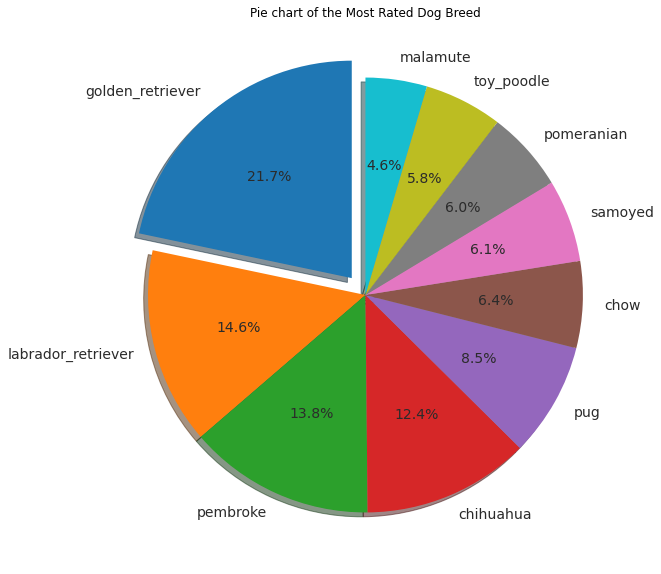

In [65]:
explode = [0.1,0,0,0,0,0,0,0,0,0]
ax = df_twitter_archive.dog_breed.value_counts()[:10].plot(kind='pie', ylabel='',figsize=(10,10), textprops={'fontsize': 14,'color':'#2b2b2b'},
                                                           autopct='%1.1f%%',shadow=True,explode=explode, startangle=90)
plt.title('Pie chart of the Most Rated Dog Breed');
#fig = ax.get_figure()
#fig.savefig('pie_dog2.png', dpi=300, quality=95,bbox_inches='tight')

## 2) Visualization and Insight
### 61.8% of dogs has a rate upove 10

Text(0.5, 1.0, 'Histogram of dog rates')

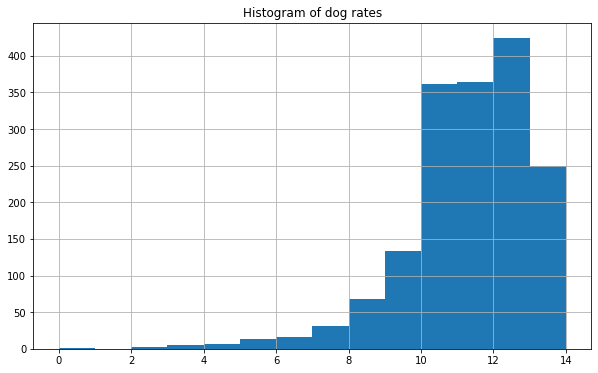

In [66]:
ax = df_twitter_archive.rating_frac.hist(bins=14, figsize=(10,6))
plt.title('Histogram of dog rates')
#fig = ax.get_figure()
#fig.savefig('hist_rate.png',dpi=300, quality=95)

In [67]:
len(df_twitter_archive.query("rating_frac > 10")) / len(df_twitter_archive) *100

61.89624329159212

## 3) Visualization and Insight
### Eskimo dog is the have the largest mean of rating

In [68]:
df_dog_breed = df_twitter_archive.groupby('dog_breed').filter(lambda x: len(x) >= 10)

In [69]:
g = df_dog_breed.groupby('dog_breed').mean()['rating_frac'].sort_values(ascending=False)
g

dog_breed
eskimo_dog                        11.777778
samoyed                           11.743590
chow                              11.609756
golden_retriever                  11.572464
cardigan                          11.529412
great_pyrenees                    11.500000
kelpie                            11.454545
pembroke                          11.443182
siberian_husky                    11.300000
cocker_spaniel                    11.296296
rottweiler                        11.294118
french_bulldog                    11.240000
bernese_mountain_dog              11.200000
teddy                             11.166667
old_english_sheepdog              11.166667
pomeranian                        11.157895
basset                            11.153846
pekinese                          11.153846
kuvasz                            11.125000
collie                            11.100000
blenheim_spaniel                  11.100000
labrador_retriever                11.086022
toy_poodle            

Text(0.5, 1.0, 'Breed vs Rating mean')

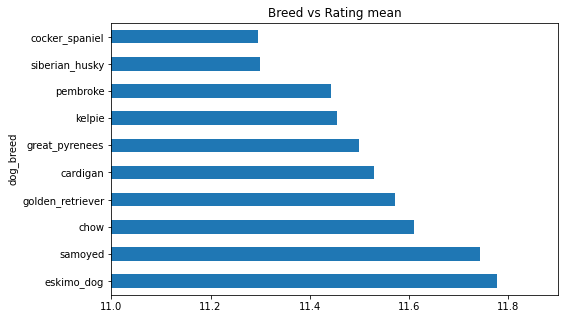

In [70]:
ax = g[:10].plot(kind='barh', figsize=(8,5),xlim=(11,11.9), ylabel='rating_mean')
plt.title('Breed vs Rating mean')
#fig = ax.get_figure()
#fig.savefig('bread_mean_rate.png',dpi=300, quality=95, bbox_inches='tight')

## 4) Visualization and Insight
### The are strong postive Correlation between retweet_count and favorite_count

Text(0.5, 1.0, 'retweet_count vs favorite_count')

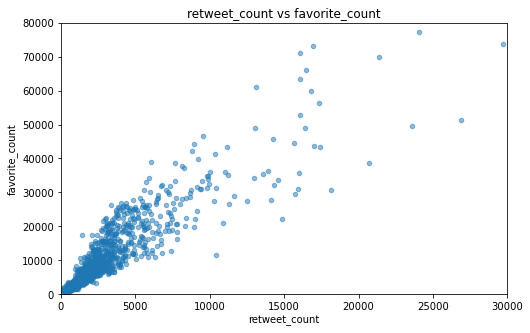

In [71]:
ax = df_twitter_archive.plot(kind='scatter', x='retweet_count', y ='favorite_count',alpha=0.5,
                        figsize=(8,5),xlim=(0,30000), ylim=(0,80000))

plt.title('retweet_count vs favorite_count')
#fig = ax.get_figure()
#fig.savefig('retweet_favorite.png',dpi=300, quality=95, bbox_inches='tight')

## 5) Visualization
### There are postive correlation between rating_frac and favorite_count

Text(0.5, 1.0, 'rating_frac vs favorite_count')

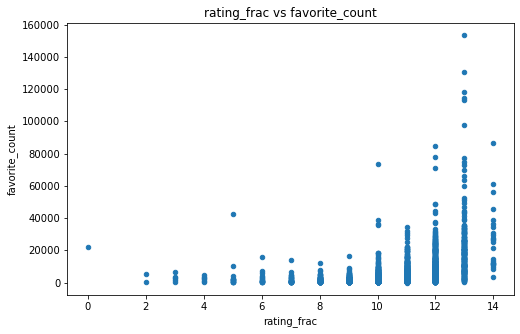

In [72]:
ax = df_twitter_archive.plot(kind='scatter', x='rating_frac', y ='favorite_count',figsize=(8,5))

plt.title('rating_frac vs favorite_count')
#fig = ax.get_figure()
#fig.savefig('rate_favorite.png',dpi=300, quality=95, bbox_inches='tight')